In [ ]:
# multiprocess 64 envs, 1 vllm, 758 seconds, outputs/rl_webagent/multiprocess_miniwob_llama31_8b/2025-06-16/10-56-34
# env server 64, 1 vllm,        677 seconds, outputs/rl_webagent/remote_webagent_llama31_8b/2025-06-16/12-19-25
# env server 64, 2 vllm,        603 seconds, outputs/rl_webagent/remote_webagent_llama31_8b/2025-06-16/12-53-38

In [31]:
exp_dir = "/home/toolkit/TapeAgents/outputs/rl_webagent/remote_webagent_llama31_8b/2025-06-16/12-53-38"

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from examples.rl_webagent.steps import WebTape
from tapeagents.io import load_tapes

tapes = load_tapes(WebTape, f"{exp_dir}/tapes/", ".json")
print(len(tapes))

250


In [34]:
def token_stats(tape, name):
    tape_prompt_tokens = []
    per_step = []
    for tape in tapes:
        tape_tokens = 0
        for step in tape.steps:
            tokens = step.metadata.other.get("llm_call", {}).get("prompt_length_tokens", 0)
            if tokens:
                per_step.append(tokens)
            tape_tokens += tokens
        tape_prompt_tokens.append(tape_tokens)

    plt.figure(figsize=(10, 6))
    plt.hist(tape_prompt_tokens, bins=30)
    plt.title("Distribution of Total Prompt Tokens per Tape for {name}")
    plt.xlabel("Total Prompt Tokens")
    plt.ylabel("Number of Tapes")
    plt.show()

    min_tokens = min(tape_prompt_tokens)
    max_tokens = max(tape_prompt_tokens)
    median_tokens = np.median(tape_prompt_tokens)

    p10 = np.percentile(tape_prompt_tokens, 10)
    p90 = np.percentile(tape_prompt_tokens, 90)
    print(name)
    print(f"Min prompt tokens per tape: {min_tokens}")
    print(f"Max prompt tokens per tape: {max_tokens}")
    print(f"Median prompt tokens per tape: {median_tokens:.2f}")
    print(f"Mean prompt tokens per tape: {np.mean(tape_prompt_tokens):.2f}")
    print(f"10th percentile: {p10:.2f}")
    print(f"90th percentile: {p90:.2f}")
    print(f"Total prompt tokens across all tapes: {sum(tape_prompt_tokens)}")
    print(f"Mean per step prompt tokens: {np.mean(per_step):.2f}")

In [ ]:
def time_stats(tapes, name):
    execution_times = [
        tape.metadata.result["execution_time"] for tape in tapes if "execution_time" in tape.metadata.result
    ]
    step_counts = [len(tape.steps) for tape in tapes]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot execution time histogram
    ax1.hist(execution_times, bins=30)
    ax1.set_title("Execution Time Distribution")
    ax1.set_xlabel("Execution Time")
    ax1.set_ylabel("Frequency")

    # Plot step count histogram
    ax2.hist(step_counts, bins=30)
    ax2.set_title("Step Count Distribution")
    ax2.set_xlabel("Number of Steps")
    ax2.set_ylabel("Frequency")

    llm_times = []
    env_times = []
    llm_per_call = []
    env_per_call = []
    for tape in tapes:
        llm_time = 0
        env_time = 0
        for step in tape.steps:
            step_llm = step.metadata.other.get("llm_call_time", 0)
            step_env = step.metadata.other.get("action_execution_time", 0)
            llm_time += step_llm
            env_time += step_env
            llm_per_call.append(step_llm)
            env_per_call.append(step_env)
        total_time = tape.metadata.result.get("execution_time", 0)
        print(
            f"Total Time: {total_time:.2f} seconds, LLM Time: {llm_time:.2f} seconds, Env Time: {env_time:.2f} seconds"
        )
        llm_times.append(llm_time)
        env_times.append(env_time)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.hist(llm_times, bins=30)
    ax1.set_title("LLM Time per tape")
    ax1.set_xlabel("LLM Time (seconds)")
    ax1.set_ylabel("Frequency")

    ax2.hist(env_times, bins=30)
    ax2.set_title("Environment Time per tape")
    ax2.set_xlabel("Environment Time (seconds)")
    ax2.set_ylabel("Frequency")

    # Plot per call time distributions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.hist(llm_per_call, bins=30)
    ax1.set_title("LLM Per Call")
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Frequency")

    ax2.hist(env_per_call, bins=30)
    ax2.set_title("Environment Per Call")
    ax2.set_xlabel("Time (seconds)")
    ax2.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    print(name)
    print("LLM Calls time Stats")
    print(f"Mean: {np.mean(llm_times):.2f} seconds")
    print(f"Median: {np.median(llm_times):.2f} seconds")
    print(f"Min: {min(llm_times):.2f} seconds")
    print(f"Max: {max(llm_times):.2f} seconds")
    print(f"Std: {np.std(llm_times):.2f} seconds")
    print("\nEnvironment Time Stats:")
    print(f"Mean: {np.mean(env_times):.2f} seconds")
    print(f"Median: {np.median(env_times):.2f} seconds")
    print(f"Min: {min(env_times):.2f} seconds")
    print(f"Max: {max(env_times):.2f} seconds")
    print(f"Std: {np.std(env_times):.2f} seconds")

    print("\nLLM Call Time per Step:")
    print(f"Mean: {np.mean(llm_per_call):.2f} seconds")
    print(f"Median: {np.median(llm_per_call):.2f} seconds")
    print(f"Min: {min(llm_per_call):.2f} seconds")
    print(f"Max: {max(llm_per_call):.2f} seconds")
    print(f"Std: {np.std(llm_per_call):.2f} seconds")
    print("\nEnvironment Call Time per Step:")
    print(f"Mean: {np.mean(env_per_call):.2f} seconds")
    print(f"Median: {np.median(env_per_call):.2f} seconds")
    print(f"Min: {min(env_per_call):.2f} seconds")
    print(f"Max: {max(env_per_call):.2f} seconds")
    print(f"Std: {np.std(env_per_call):.2f} seconds")

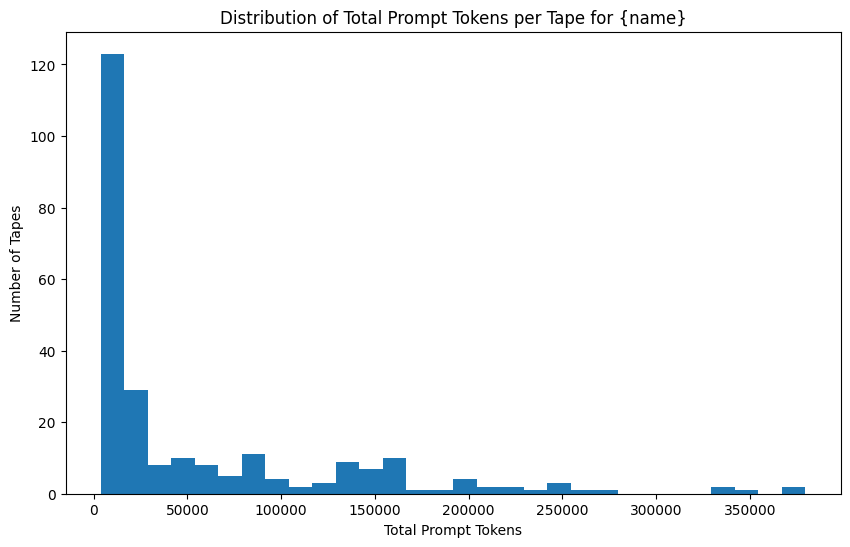

env server 64, vllm 1
Min prompt tokens per tape: 3881
Max prompt tokens per tape: 379703
Median prompt tokens per tape: 17212.50
Mean prompt tokens per tape: 57277.20
10th percentile: 4667.10
90th percentile: 162449.70
Total prompt tokens across all tapes: 14319301
Mean per step prompt tokens: 4143.32


In [30]:
token_stats(tapes, "env server 64, vllm 1")

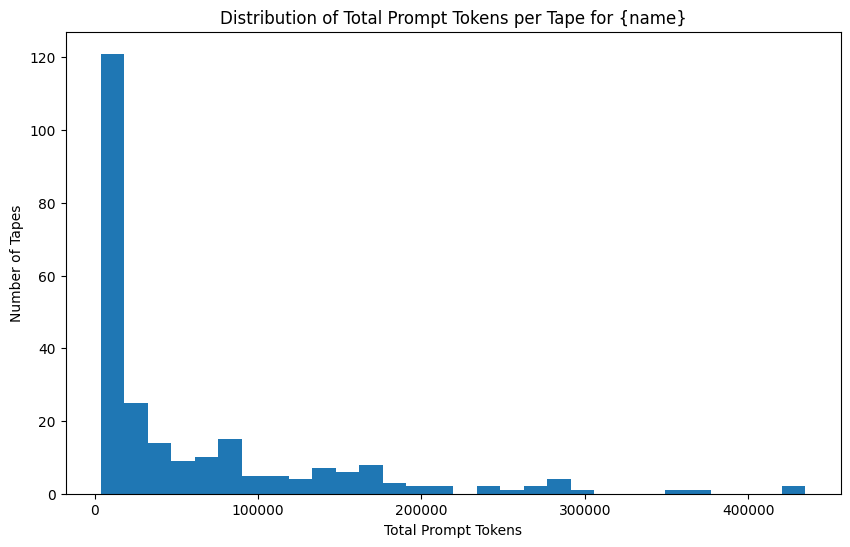

env server 64, vllm 2
Min prompt tokens per tape: 3859
Max prompt tokens per tape: 434900
Median prompt tokens per tape: 18939.50
Mean prompt tokens per tape: 60094.30
10th percentile: 4605.00
90th percentile: 165504.00
Total prompt tokens across all tapes: 15023575
Mean per step prompt tokens: 4239.16


In [36]:
token_stats(tapes, "env server 64, vllm 2")

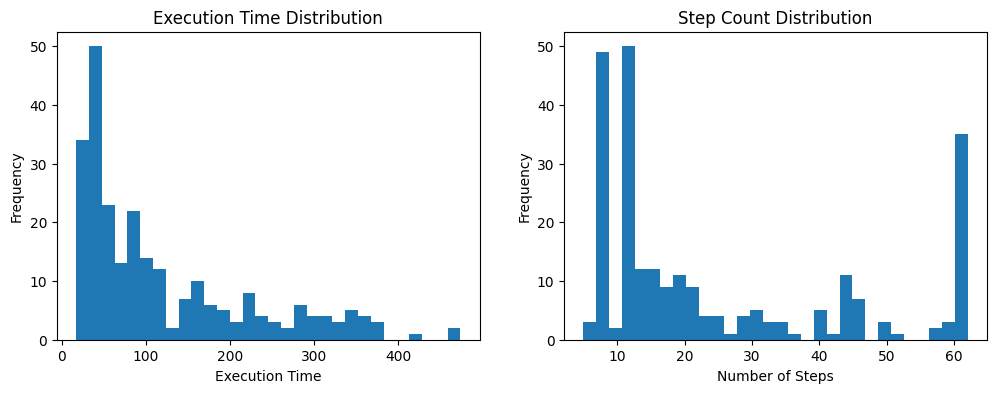

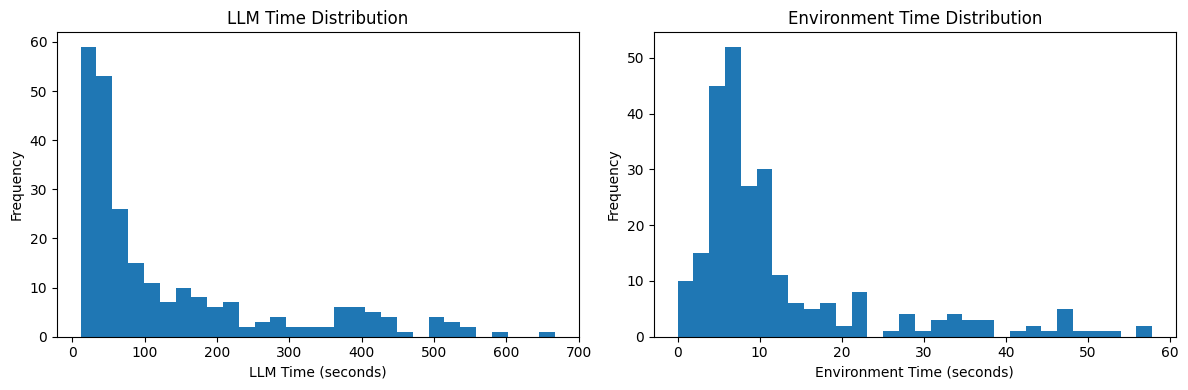

env server 64, 1 vllm
LLM Calls time Stats
Mean: 135.20 seconds
Median: 66.94 seconds
Min: 11.37 seconds
Max: 667.41 seconds
Std: 144.16 seconds

Environment Time Stats:
Mean: 12.42 seconds
Median: 7.87 seconds
Min: 0.00 seconds
Max: 57.82 seconds
Std: 11.85 seconds


In [25]:
time_stats(tapes, "env server 64, 1 vllm")

AttributeError: 'WebTapeMetadata' object has no attribute 'name'

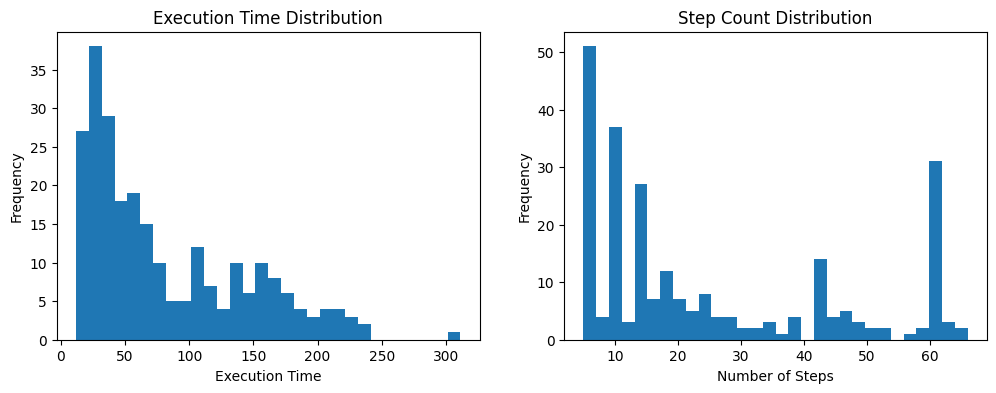

In [43]:
time_stats(tapes, "env server 64, vllm 2")